# Import Libraries & Data

In [52]:
# Data Analysis
import numpy as np
import pandas as pd
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [50]:
# Import Data
data = pd.read_csv("/content/dataset-maintenace.csv")

In [51]:
import warnings
warnings.filterwarnings('ignore')

# DATA Visualization#



In [53]:
data.head()

,UDI,Product ID,Type,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   air_temperature      10000 non-null  float64
 4   process_temperature  10000 non-null  float64
 5   rotational_speed     10000 non-null  int64  
 6   torque               10000 non-null  float64
 7   tool_wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [54]:
data.describe()

,UDI,air_temperature,process_temperature,rotational_speed,torque,tool_wear,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


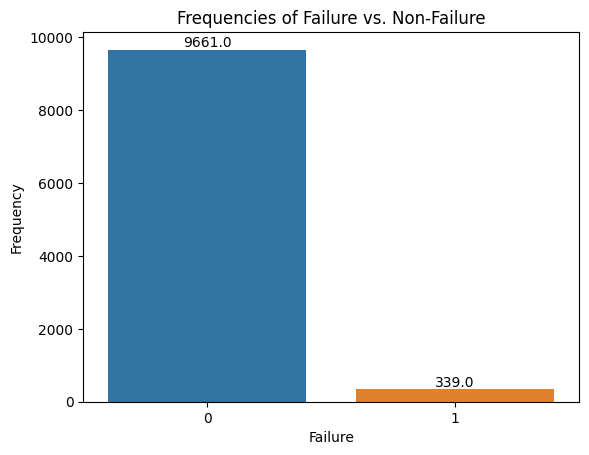

In [9]:
# Create a bar graph of No. of Failures vs Non-Failures
sns.countplot(x='Target', data=data)
plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

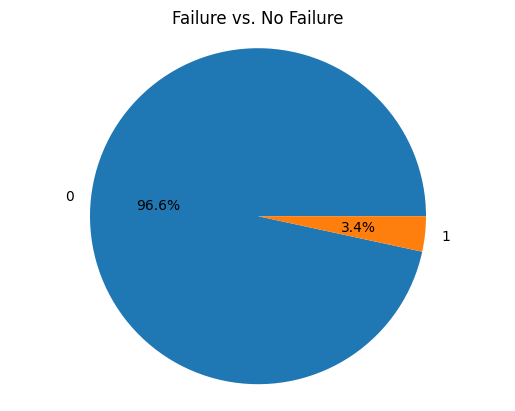

In [ ]:
# Create a pie chart of Failures vs No Failures
category_counts = data['Target'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Failure vs. No Failure')
plt.show()

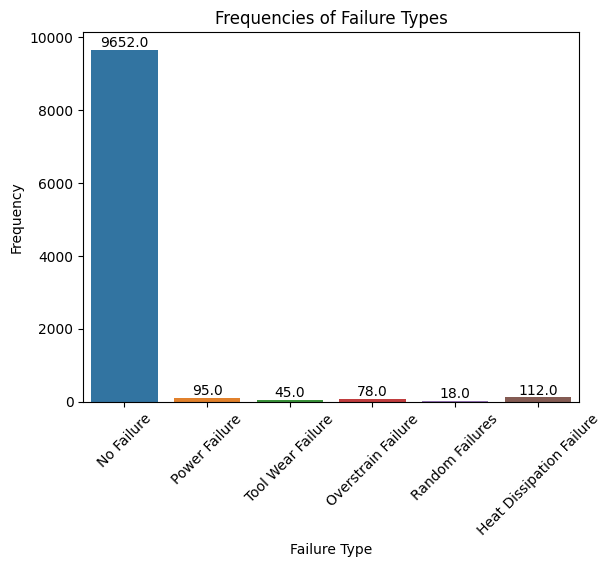

In [ ]:
sns.countplot(x='Failure Type', data=data)
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

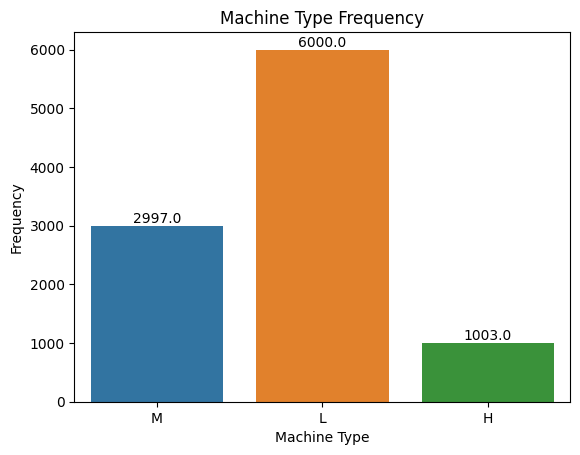

In [42]:
# Create Bar Graph of Machine Type Frequency
sns.countplot(x='Type', data=data)
plt.xlabel('Machine Type')
plt.ylabel('Frequency')
plt.title('Machine Type Frequency')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

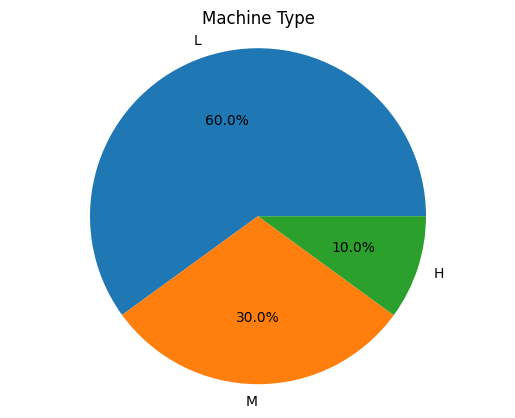

In [43]:
# Create Pie Chart of Machine Type Frequency
category_counts = data['Type'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Machine Type')
plt.show()

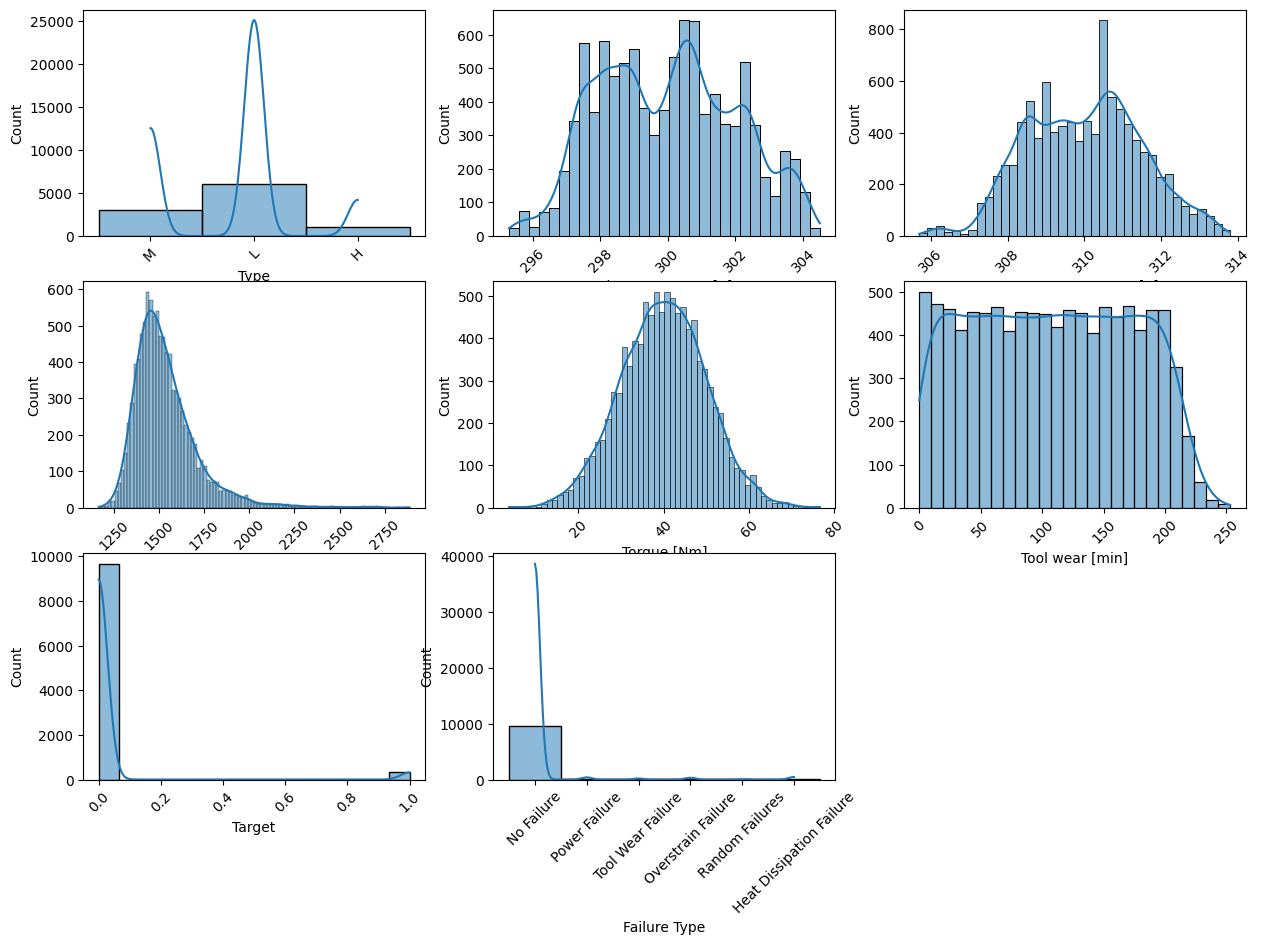

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data[col],kde=True)
    plt.xticks(rotation=45)

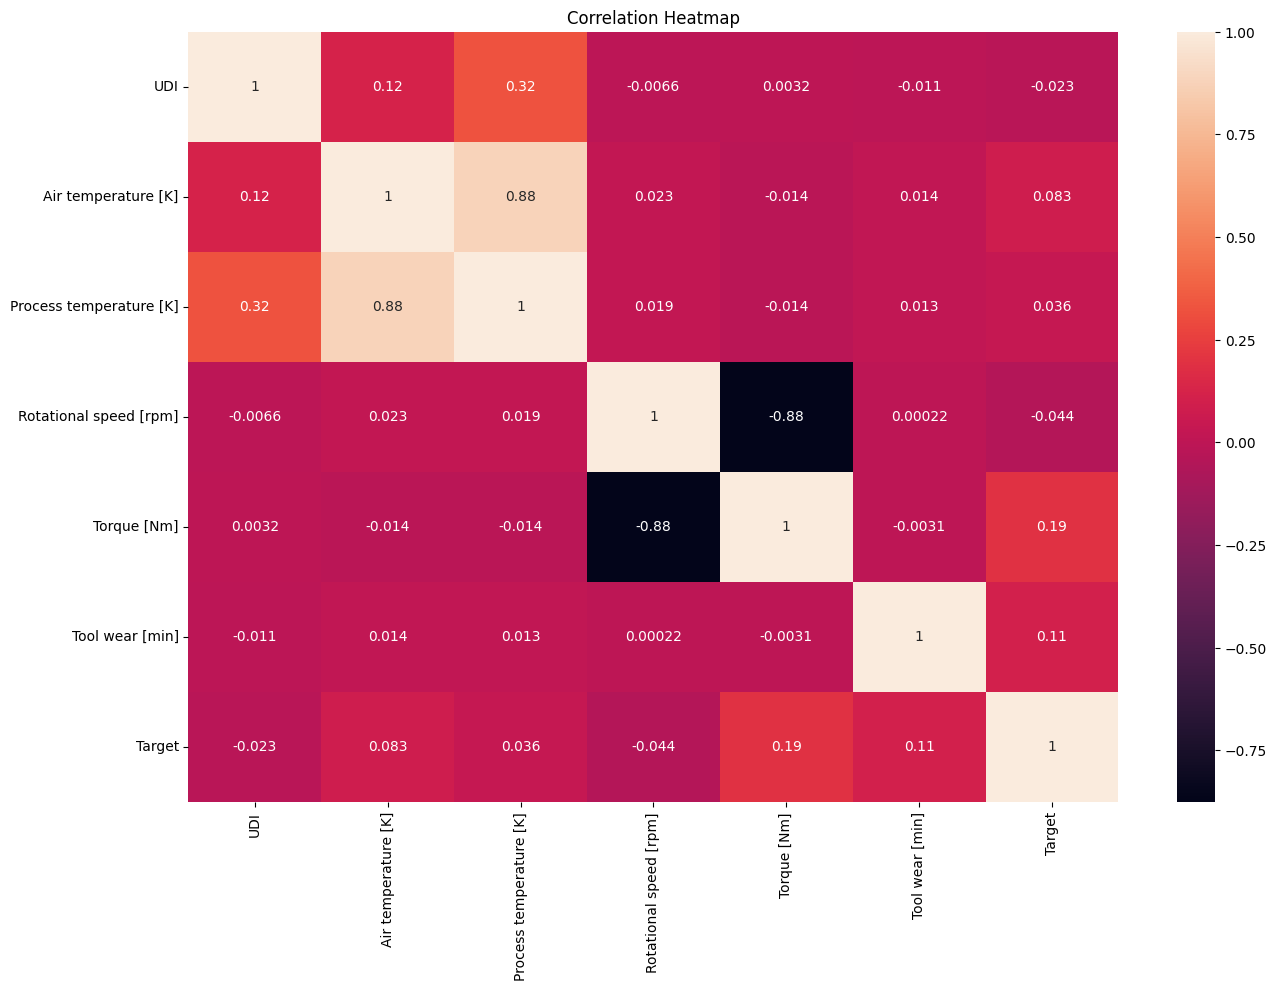

In [18]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data=data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Read the CSV file
data = pd.read_csv("/content/dataset-maintenace.csv")


X = data.drop(['Target', 'Failure Type', 'Product ID', 'Type'], axis=1)
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate training accuracy
svm_train = svm_model.score(X_train, y_train) * 100

# Calculate model accuracy on the test set
svm_accuracy = accuracy_score(y_test, y_pred) * 100

# Print results
print("Training Accuracy    :", svm_train, "%")
print("Model Accuracy Score :", svm_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("SVC Classification_Report: \n")
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))


Training Accuracy    : 96.8875 %
Model Accuracy Score : 97.15 %
--------------------------------------------------------
SVC Classification_Report: 

--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.58      0.25      0.34        61

    accuracy                           0.97      2000
   macro avg       0.78      0.62      0.67      2000
weighted avg       0.96      0.97      0.97      2000



In [57]:
import joblib
# Download the model

joblib.dump(svm_model, 'svm_model1.joblib')


['svm_model1.joblib']

**In order to address the imbalanced data, I will use SMOTE to create new failure data types.**

In [58]:
new_data = X_test.iloc[0:500]
# Make predictions
y_pred = svm_model.predict(new_data)
print("Predictions:", y_pred)


Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

In [33]:
import sklearn
print(sklearn.__version__)



1.2.2
